# Лабораторна робота 1

**Виконав:** Чик Іван<br>
**Мета:** Змінити код нейронної мережі для збільшення точності прогнозів.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/

Mounted at /content/gdrive
/content/gdrive/MyDrive


1. Імпортуємо бібліотеки для роботи з даними та для машинного навчання

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import keras
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

2. Завантажуємо датасет у змінну та підготовлюємо його за допомогою функцій MinMaxScaler() та OneHotEncoder()

In [ ]:
dataset = np.loadtxt("machine learning/pima-indians-diabetes.csv", delimiter=",")
X=MinMaxScaler().fit_transform(dataset[:,0:8])
Y=dataset[:,8].reshape(-1,1)
Y_enc=OneHotEncoder().fit_transform(Y).toarray()
input_dim=np.size(X,1)

3. Створюємо модель нейронної мережі:
Перший прихований шар - 256 нейронів, функція активації ReLU
Другий прихований шар - 128 нейронів, функція активації ReLU
Вихідний шар - 2 нейрони, функція активації SoftMax

In [ ]:
model = Sequential([
  Dense(256, input_dim=np.size(X,1), activation='relu'),
  Dense(128, activation='relu'),
  Dense(2, activation='softmax')])

4. Скомпільовуємо модель, функція втрат - binary crossentropy та оптимізатор Adam із рівнем навчання 0.001


In [ ]:
#model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()
start=datetime.now()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2304      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
Total params: 35458 (138.51 KB)
Trainable params: 35458 (138.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5. Підігнати модель до даних означає навчити модель на певних даних(X та Y_enc).
verbose=2 вказує, скільки логів ми побачимо під час руху моделі

In [ ]:
history = model.fit(X, Y_enc, epochs=400, batch_size=8, verbose=2)
end = datetime.now()
print("Training time",end-start)
loss, accuracy = model.evaluate(X, Y_enc)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

Epoch 1/400
96/96 - 3s - loss: 0.0386 - accuracy: 0.9883 - 3s/epoch - 29ms/step
Epoch 2/400
96/96 - 0s - loss: 0.0737 - accuracy: 0.9805 - 169ms/epoch - 2ms/step
Epoch 3/400
96/96 - 0s - loss: 0.0340 - accuracy: 0.9870 - 175ms/epoch - 2ms/step
Epoch 4/400
96/96 - 0s - loss: 0.0257 - accuracy: 0.9896 - 164ms/epoch - 2ms/step
Epoch 5/400
96/96 - 0s - loss: 0.1444 - accuracy: 0.9648 - 169ms/epoch - 2ms/step
Epoch 6/400
96/96 - 0s - loss: 0.0580 - accuracy: 0.9779 - 166ms/epoch - 2ms/step
Epoch 7/400
96/96 - 0s - loss: 0.0435 - accuracy: 0.9818 - 175ms/epoch - 2ms/step
Epoch 8/400
96/96 - 0s - loss: 0.0939 - accuracy: 0.9818 - 165ms/epoch - 2ms/step
Epoch 9/400
96/96 - 0s - loss: 0.0403 - accuracy: 0.9870 - 159ms/epoch - 2ms/step
Epoch 10/400
96/96 - 0s - loss: 0.0268 - accuracy: 0.9896 - 172ms/epoch - 2ms/step
Epoch 11/400
96/96 - 0s - loss: 0.0157 - accuracy: 0.9948 - 173ms/epoch - 2ms/step
Epoch 12/400
96/96 - 0s - loss: 0.0020 - accuracy: 1.0000 - 180ms/epoch - 2ms/step
Epoch 13/400
96

6. Функція predict() - це те, що ми викликаємо для того, щоб модель робила прогнози. У функцію predict() ми передаємо змінну під назвою X. Це змінна, яка містить наші тестові дані

In [ ]:
probabilities = model.predict(X)
prob=probabilities[:,0]
predictions = [float(round(x)) for x in prob]
accuracy = np.mean(predictions == Y)
print("Prediction Accuracy: %.2f%%" % (accuracy*100))
accuracy=history.history['accuracy']
loss=history.history['loss']

model.save('my_model.h5')

24/24 [==============================] - 0s 1ms/step
Prediction Accuracy: 45.56%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7. Будуємо графік функції втрат, як бачимо, втрати рухаються до нуля

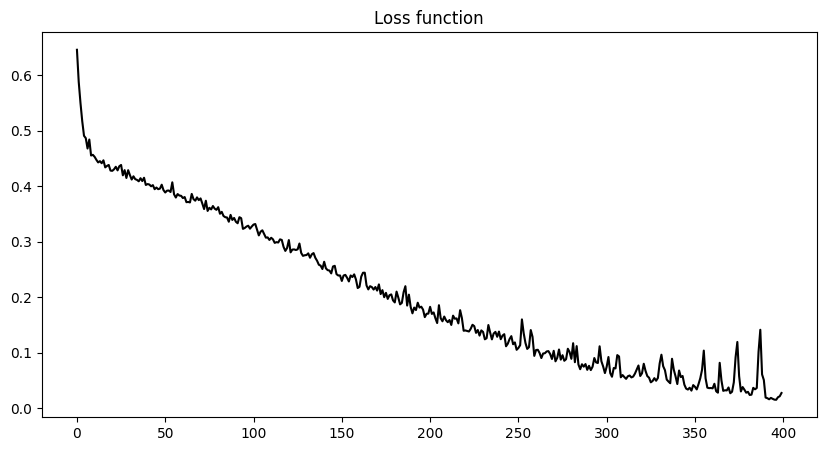

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Loss function')
plt.plot(loss, 'k')

plt.show()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               2304      
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 2)                 258       
                                                                 
Total params: 35458 (138.51 KB)
Trainable params: 35458 (138.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/400
96/96 - 1s - loss: 0.6496 - accuracy: 0.6589 - 549ms/epoch - 6ms/step
Epoch 2/400
96/96 - 0s - loss: 0.5944 - accuracy: 0.6992 - 106ms/epoch - 1ms/step
Epoch 3/400
96/96 - 0s - loss: 0.5396 - accuracy: 0.7188 - 110ms/epoch - 1ms/step
Epoch 4/400
96/96 - 0s - loss: 0.5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


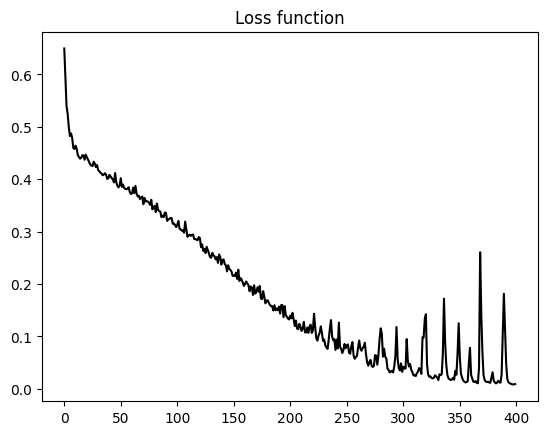

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import keras
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

dataset = np.loadtxt("machine learning/pima-indians-diabetes.csv", delimiter=",")
X=MinMaxScaler().fit_transform(dataset[:,0:8])
Y=dataset[:,8].reshape(-1,1)
Y_enc=OneHotEncoder().fit(Y).transform(Y).toarray()
input_dim=np.size(X,1)

model = Sequential([
  Dense(256, input_dim=np.size(X,1), activation='relu'),
  Dense(128, activation='relu'),
  Dense(2, activation='softmax')])

#model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()
start=datetime.now()

history = model.fit(X, Y_enc, epochs=400, batch_size=8, verbose=2)
end = datetime.now()
print("Training time",end-start)
loss, accuracy = model.evaluate(X, Y_enc)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

probabilities = model.predict(X)
prob=probabilities[:,0]
predictions = [float(round(x)) for x in prob]
accuracy = np.mean(predictions == Y)
print("Prediction Accuracy: %.2f%%" % (accuracy*100))
accuracy=history.history['accuracy']
loss=history.history['loss']

model.save('my_model.h5')

plt.title('Loss function')
plt.plot(loss, 'k')

plt.show()

---

**ЧЕРНЕТКА**

---



In [ ]:
!pip install numpy==1.21.6


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.4.14 requires numpy>=1.22, but you have numpy 1.21.6 which is incompatible.
jaxlib 0.4.14+cuda11.cudnn86 requires numpy>=1.22, but you have numpy 1.21.6 which is incompatible.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.21.6 which is incompatible.


In [ ]:
import numpy as np

a = np.arange(1, 4, dtype = float)
b = np.arange(-100, 1)

d = a[:,np.newaxis]

print(d)

dimensions = d.ndim

print("Number of dimensions:", dimensions)


[[1.]
 [2.]
 [3.]]
Number of dimensions: 2


In [ ]:
import numpy as np

a = np.array([1, 3, 0], float)
b = np.array([0, 3, 2], float)
print(a > b)
print(np.where(a > 0, 3, 2))

[ True False False]
[3 3 2]


In [ ]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], float)

for i in a[::-1]:
    print(i[::-1])

print(a[1], a[0])

[9. 8. 7.]
[6. 5. 4.]
[3. 2. 1.]
[4. 5. 6.] [1. 2. 3.]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(5, input_shape=(3, ), activation='relu'),
    Dense(2, activation='softmax')
])


In [ ]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

train_labels = []
train_samples = []

for i in range(1000):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

for i in train_samples:
  print(i)


for i in range(50):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)



In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

for i in scaled_train_samples:
  print(i)

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
print(np.zeros_like(a))
print(np.ones_like(a))
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 2. 3.]
 [4. 5. 6.]]


In [ ]:
a = np.array([[1,2], [3,4]], float)
b = np.array([[2,0], [1,3]], float)
print(a * b)

[[ 2.  0.]
 [ 3. 12.]]


In [ ]:
import numpy as np

a = np.array([0, 1, 2,
              3, 4, 5,
             6, 7, 8], float)

print(a)

print(a.reshape(-1,1))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

model = Sequential([
    Dense(16, input_shape =(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
f = open("1.txt", "r")
print(f.readline())

INSERT INTO my_contacts (last_name, first_name, email, birthday, profession, location, status



In [ ]:
import numpy as np

a = np.array([[[1], [2], [3]], [[4], [5], [6]]], dtype="object")
print(a[-1:, -2:])
print(a.shape)
b = a.flatten()
for i in b[::-1]:
  print(i)

dimensions = a.ndim

print("Number of dimensions:", dimensions)


[[[5]
  [6]]]
(2, 3, 1)
6
5
4
3
2
1
Number of dimensions: 3


---

**Оригінальний код**

---

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 21 12:13:34 2022

@author: maksymyuk
"""

# Sample Multilayer Perceptron Neural Network in Keras
from keras.models import Sequential, load_model
from keras.layers import Dense
import keras
from datetime import datetime
import numpy
# load and prepare the dataset
dataset = numpy.loadtxt("machine learning/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
input_dim=numpy.size(X,1)
# 1. define the network
model = Sequential()
model.add(Dense(24, input_dim=numpy.size(X,1), activation='tanh'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #relu, sigmoid, tanh
# 2. compile the network
sgd=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
rmsprop=keras.optimizers.RMSprop()
#SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])#adam,sgd, RMSprop
model.summary()

start=datetime.now()
# 3. fit the network
history = model.fit(X, Y, epochs=10, batch_size=1)
end = datetime.now()
print("Training time",end-start)
# 4. evaluate the network
loss, accuracy = model.evaluate(X, Y)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
# 5. make predictions
probabilities = model.predict(X)
prob=probabilities[:,0]
predictions = [float(round(x)) for x in prob]
accuracy = numpy.mean(predictions == Y)
print("Prediction Accuracy: %.2f%%" % (accuracy*100))
accuracy=history.history['accuracy']
loss=history.history['loss']

model.save('my_model.h5')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 24)                216       
                                                                 
 dense_31 (Dense)            (None, 12)                300       
                                                                 
 dense_32 (Dense)            (None, 1)                 13        
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
768/768 [==============================] - 4s 4ms/step - loss: 0.6612 - accuracy: 0.6484
Epoch 2/10
768/768 [==============================] - 3s 4ms/step - loss: 0.6185 - accuracy: 0.6536
Epoch 3/10
768/768 [==============================] - 2s 2ms/step - loss: 0.5989 - accu